 # Network Science - MDS - UDD 2021
## Introducción a Ciencia de Redes


#### Cristian Candia-Castro Vallejos, Ph.D.$^{1,2}$

- [1] Data Science Institute (IDS), Universidad del Desarrollo,Chile
- [2] Northwestern Institute on Complex Systems, Kellogg School of Management, Northwestern Unviersity, USA


## Trabajo Final

**Fecha de Presentaciones: Sábado 8 de Enero desde las 10 am**

- Máximo 10 minutos*

- 3 minutos de preguntas. (Total presentaciones 13 minutos).

- El "presentador" se elegirá al azar al momento de la presentación. Ojo, quién se ausente del grupo tendrá nota mínima por reglamento.
- **La idea es explicar todo!!!**




\* Máximo de slides NO HAY (recomendación general para presentaciones: máximo 1 slide por minuto).



##### La restricción de tiempo serán estrictas. Aproximadamente 10min + 3 min preguntas;

# Se entrega la presentación (PDF).
Deben subir su presentación (PDF) a CANVAS 24 horas antes de la presentación.

La primera diapositiva debe contener nombres / título.

### Criterio de evaluación:

    Uso de herramientas de red (integridad / uso correcto);
    Capacidad para extraer información/perspectivas de sus datos utilizando las herramientas de red; 
    (data != información)
    Calidad general del proyecto / presentación.



<img src="./img/im1.png" width="480">


### No es suficiente medir las cosas, es necesario discutir las ideas que ellas ofrecen (significado):
###### ¿Qué aprendiste de cada cantidad que mediste?
###### ¿Cuáles fueron tus expectativas?
###### ¿Cómo se comparan los resultados con tus expectativas?


# TIPS: Entre otras cosas, calcule:

- 1) Crear la grafo de carreras
- 2) Calcular 4 métricas de centralidad para cada nodo/carrera (grado, betweenness, PageRank y Closseness Centrality), interpetar cada una y dar ejemplos con carreras concretas elegidas por ustedes.
- 3) Graficar la distribución de grado (plot 1) y el coeficiente de clustering (eje-y) vs el grado de nodo (eje-x) (plot 2) (¿se parece a algún tipo de modelo visto en clases? ¿Por qué?)
- 4) Encontrar comunidades en la red usando el algoritmo de Louvain y el de Girvan Newman, interprete y compare los resultados de ambos. Grafique la red donde los colores sean según las comunidades econtradas.
- 5) Cree una matriz de distancias entre cada carrera de la red. (Explican que representa la distancia en la red y muestren la matriz en la presentación con un par de ejemplos entre pares de carrera). (revisar el comando `all_pairs_shortest_path`)
- 6) Metricas a nivel red: densidad, diámetro y modularidad (la sacan de las comunidades).





In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from random import randint
import itertools as it

%matplotlib inline

In [25]:
def txtToGraph(path):
    return nx.read_edgelist(
        path,
        comments='#',
        create_using=nx.DiGraph(),
        delimiter='	',
        nodetype=int,
        encoding='utf-8'
    )

In [26]:
graph = txtToGraph('data/powergrid.edgelist.txt')

In [27]:
def measures(graph):

    q = len(graph)
    e = graph.size()
    a = list(dict(graph.degree()).values());
    d = np.mean(a);
    maxx = max(a)
    minn = min(a)

    print('Cantidad de nodos: ', q)
    print('Cantidad de enlaces entre todos los nodos: ', e)
    print('Grados de conexion promedio: ', d)
    print('Grado de conexion minimo: ', maxx)
    print('Grado de conexion maximo: ', minn)

    return a, maxx, minn

In [28]:
measures = measures(graph)

Cantidad de nodos:  4941
Cantidad de enlaces entre todos los nodos:  6594
Grados de conexion promedio:  2.66909532483303
Grado de conexion minimo:  19
Grado de conexion maximo:  1


In [29]:
for n1, n2, _ in list(graph.edges(data=True)):
    print("Conexion entre el nodo [{0}] y nodo [{1}]".format(n1, n2))

Conexion entre el nodo [0] y nodo [386]
Conexion entre el nodo [0] y nodo [395]
Conexion entre el nodo [0] y nodo [451]
Conexion entre el nodo [386] y nodo [2307]
Conexion entre el nodo [386] y nodo [387]
Conexion entre el nodo [386] y nodo [445]
Conexion entre el nodo [386] y nodo [446]
Conexion entre el nodo [395] y nodo [2213]
Conexion entre el nodo [395] y nodo [2393]
Conexion entre el nodo [395] y nodo [419]
Conexion entre el nodo [451] y nodo [453]
Conexion entre el nodo [1] y nodo [3553]
Conexion entre el nodo [1] y nodo [3586]
Conexion entre el nodo [1] y nodo [3587]
Conexion entre el nodo [1] y nodo [3637]
Conexion entre el nodo [3553] y nodo [3675]
Conexion entre el nodo [2] y nodo [3583]
Conexion entre el nodo [3583] y nodo [3625]
Conexion entre el nodo [3] y nodo [4930]
Conexion entre el nodo [4930] y nodo [4931]
Conexion entre el nodo [4930] y nodo [4937]
Conexion entre el nodo [4] y nodo [88]
Conexion entre el nodo [88] y nodo [172]
Conexion entre el nodo [88] y nodo [178

In [30]:
#TODO: Comentar DESC los grados
for i in graph.degree():
    print("Nodo:", i[0], "\t\t\t\t\tEnlaces / Grado:", i[1])

Nodo: 0 					Enlaces / Grado: 3
Nodo: 386 					Enlaces / Grado: 6
Nodo: 395 					Enlaces / Grado: 5
Nodo: 451 					Enlaces / Grado: 3
Nodo: 1 					Enlaces / Grado: 4
Nodo: 3553 					Enlaces / Grado: 3
Nodo: 3586 					Enlaces / Grado: 2
Nodo: 3587 					Enlaces / Grado: 2
Nodo: 3637 					Enlaces / Grado: 3
Nodo: 2 					Enlaces / Grado: 1
Nodo: 3583 					Enlaces / Grado: 3
Nodo: 3 					Enlaces / Grado: 1
Nodo: 4930 					Enlaces / Grado: 3
Nodo: 4 					Enlaces / Grado: 1
Nodo: 88 					Enlaces / Grado: 8
Nodo: 5 					Enlaces / Grado: 2
Nodo: 120 					Enlaces / Grado: 2
Nodo: 13 					Enlaces / Grado: 5
Nodo: 6 					Enlaces / Grado: 1
Nodo: 8 					Enlaces / Grado: 3
Nodo: 7 					Enlaces / Grado: 1
Nodo: 9 					Enlaces / Grado: 6
Nodo: 10 					Enlaces / Grado: 2
Nodo: 205 					Enlaces / Grado: 7
Nodo: 208 					Enlaces / Grado: 2
Nodo: 61 					Enlaces / Grado: 3
Nodo: 75 					Enlaces / Grado: 2
Nodo: 50 					Enlaces / Grado: 3
Nodo: 11 					Enlaces / Grado: 2
Nodo: 125 					Enlaces / Grado: 3
N

In [31]:
def plotGraphDstribution(kmin, kmax, degrees, plot_type = 'loglog'):

    if plot_type == 'loglog':
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)
    elif plot_type == 'l':
        bin_edges = np.linspace(kmin, kmax, num=100)

    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(15, 15))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)

    if plot_type == 'loglog':
        plt.loglog(x, density, marker='o', linestyle='none')
    elif plot_type == 'l':
        plt.plot(x, density, marker='o', linestyle='none')


    plt.xlabel(r"Grado $k$", fontsize=16)
    plt.ylabel(r"$Probabilidad(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    plt.show()

In [32]:
def plotGraph(graph, plot_type = 'spring'):
    fig = plt.figure(figsize=(15, 15))
    if plot_type == 'spring':
        nx.draw_spring(graph, node_size=40)
    elif plot_type == 'circular':
        nx.draw_circular(graph, node_size=20)

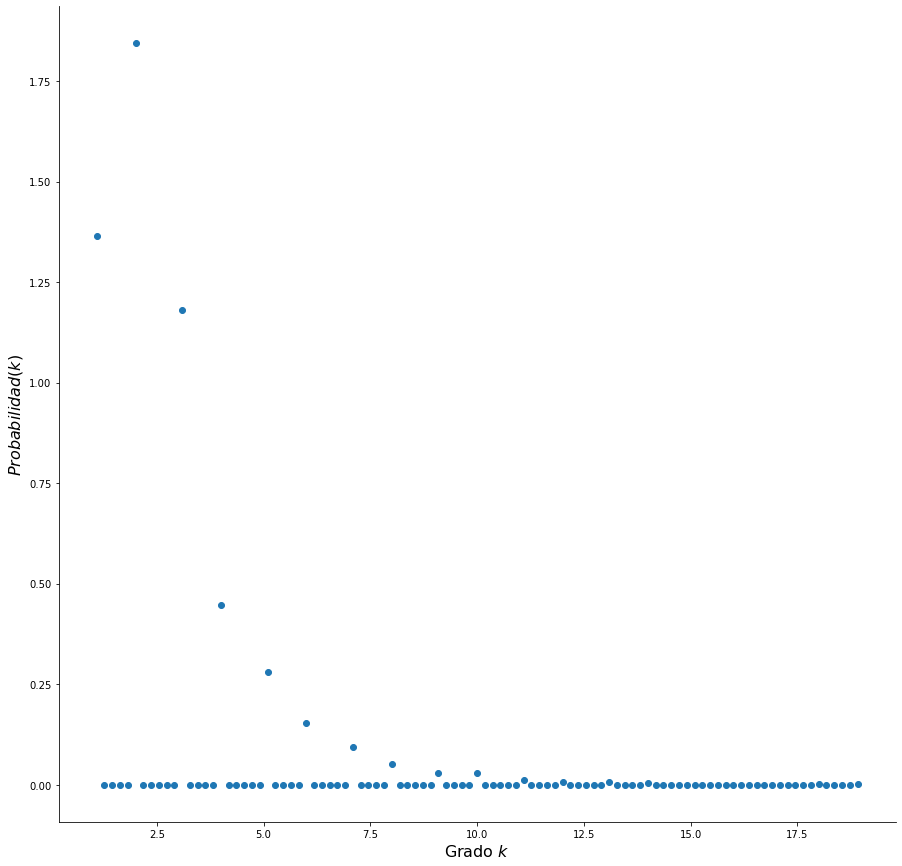

In [33]:
plotGraphDstribution(measures[2], measures[1], measures[0], 'l')

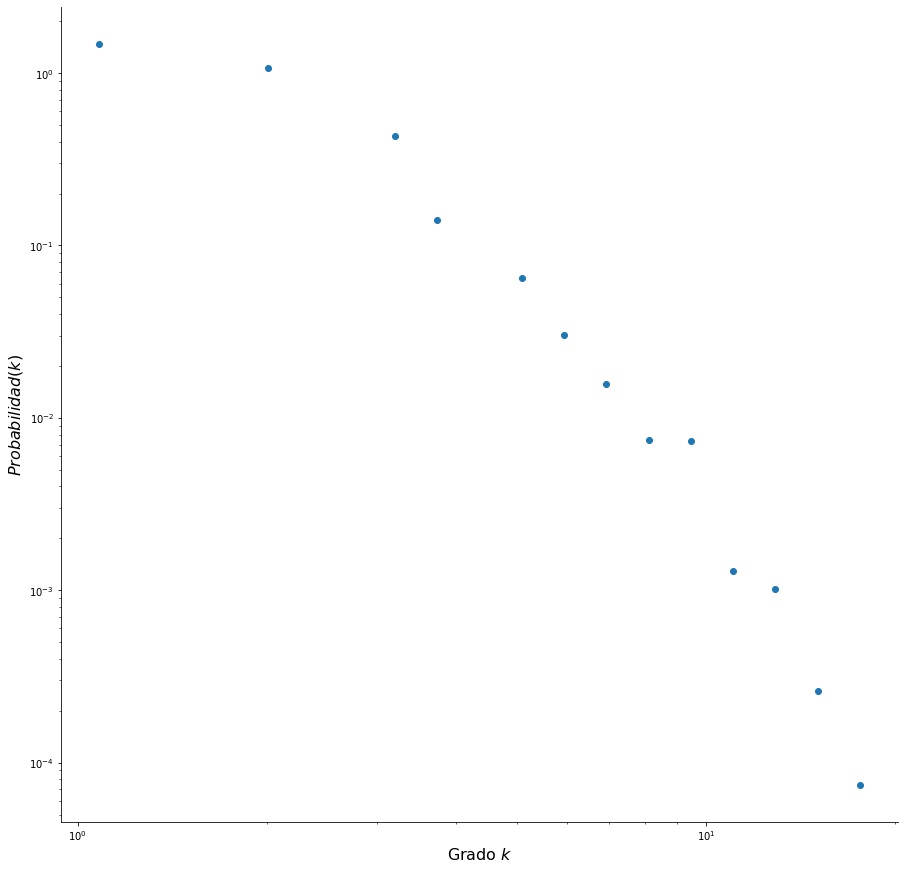

In [34]:
plotGraphDstribution(measures[2], measures[1], measures[0])

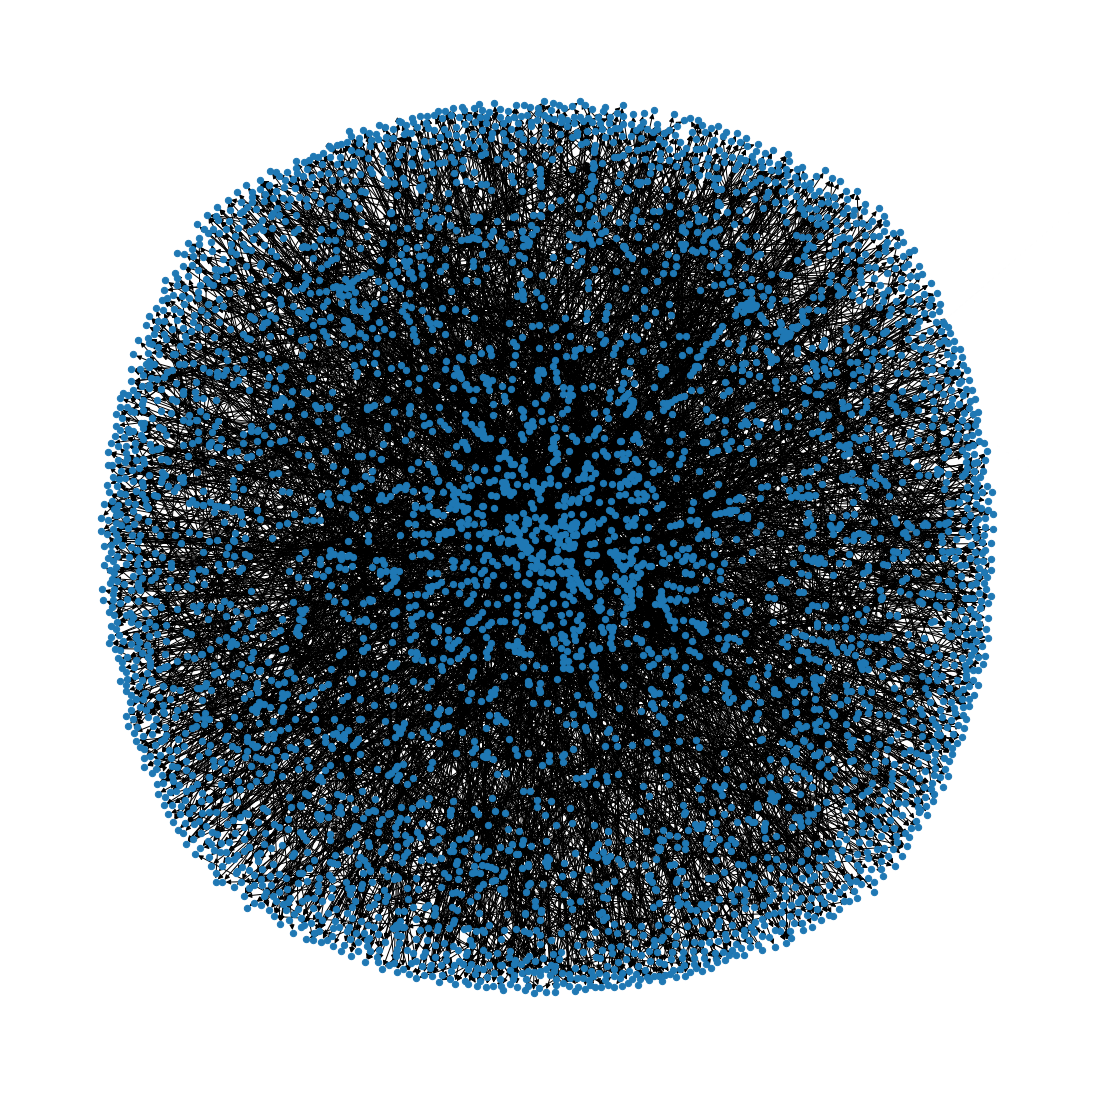

In [35]:
plotGraph(graph, plot_type = 'spring')

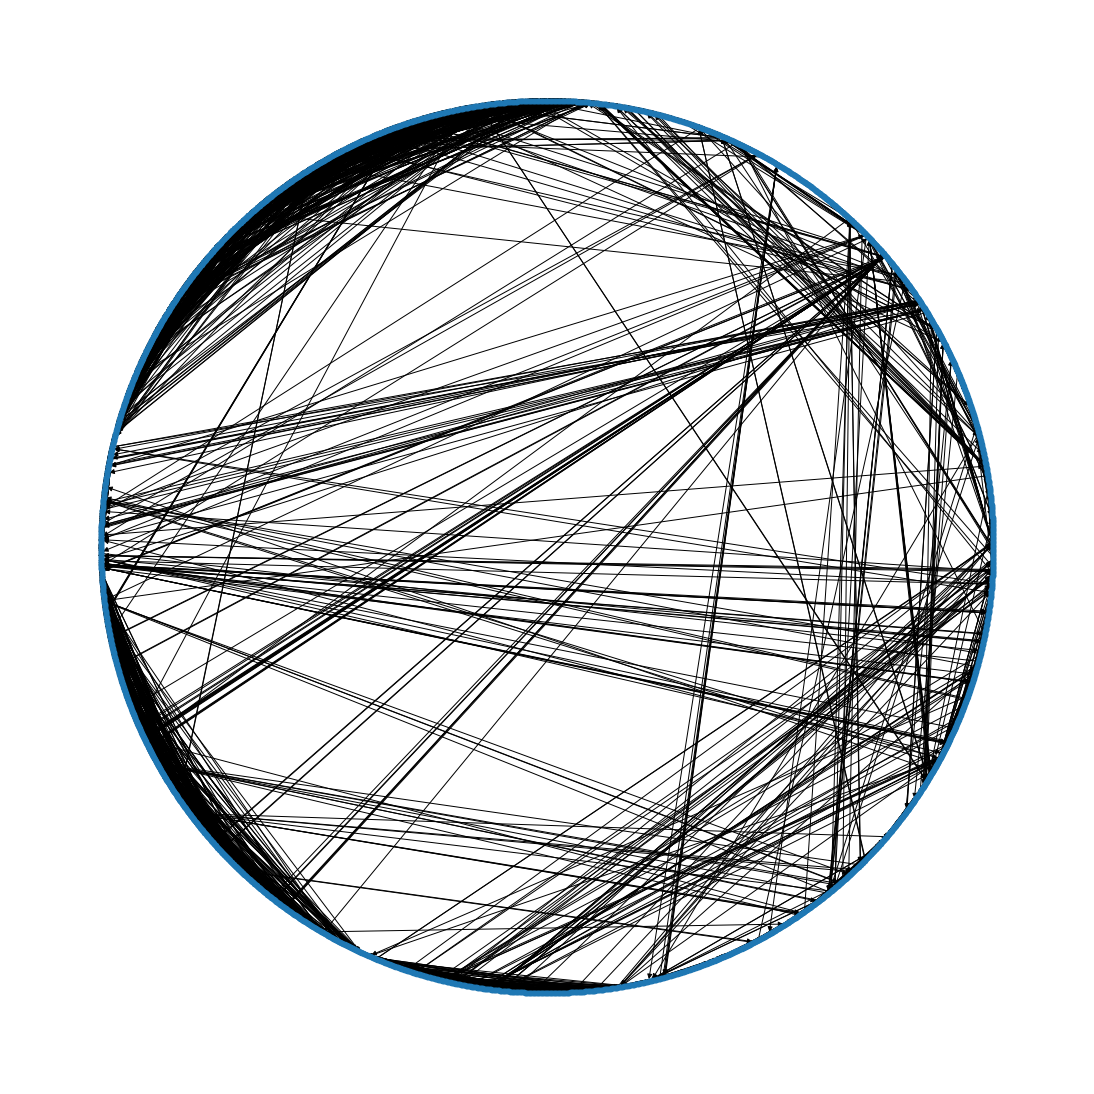

In [36]:
plotGraph(graph, plot_type = 'circular')

# Medidas de centralidad

Aqui podemos ver las medidas de centralidad del dataset de las centrales electricas

In [37]:
#Grado de centralidad
#Representa cuantas conexiones tiene una central electrica con otras centrales vecinas
degree = nx.degree_centrality(graph)
for (nodo, centralidad) in reversed(sorted(degree.items(), key=lambda x: x[1])):
    print('El nodo ',nodo," tiene centralidad: ",centralidad, " entre toda la red")

El nodo  2553  tiene centralidad:  0.003846153846153846  entre toda la red
El nodo  4458  tiene centralidad:  0.0036437246963562753  entre toda la red
El nodo  4345  tiene centralidad:  0.0028340080971659917  entre toda la red
El nodo  3468  tiene centralidad:  0.0028340080971659917  entre toda la red
El nodo  831  tiene centralidad:  0.0028340080971659917  entre toda la red
El nodo  3895  tiene centralidad:  0.002631578947368421  entre toda la red
El nodo  2585  tiene centralidad:  0.002631578947368421  entre toda la red
El nodo  2575  tiene centralidad:  0.002631578947368421  entre toda la red
El nodo  2382  tiene centralidad:  0.002631578947368421  entre toda la red
El nodo  2542  tiene centralidad:  0.002631578947368421  entre toda la red
El nodo  2439  tiene centralidad:  0.00242914979757085  entre toda la red
El nodo  2662  tiene centralidad:  0.00242914979757085  entre toda la red
El nodo  2434  tiene centralidad:  0.00242914979757085  entre toda la red
El nodo  2617  tiene cent

In [68]:
min(degree.values())

0.00020242914979757084

In [69]:
max(degree.values())

0.003846153846153846

In [38]:
#Betweenness centrality o centralidad de intermediacion
#Como nos encontramos una central electrica entre medio del camino entre A y Z pasando por B, C, D
between = nx.betweenness_centrality(graph, normalized = True, endpoints = False)
for (nodo, bet_centrality) in reversed(sorted(between.items(), key=lambda x: x[1])):
    print('El nodo ', nodo, " tiene betweenness centrality: ", bet_centrality, " entre toda la red")

El nodo  3781  tiene betweenness centrality:  3.9961210984537674e-05  entre toda la red
El nodo  726  tiene betweenness centrality:  3.8362762545156165e-05  entre toda la red
El nodo  3785  tiene betweenness centrality:  3.1518124356009714e-05  entre toda la red
El nodo  2606  tiene betweenness centrality:  2.3730811446202374e-05  entre toda la red
El nodo  725  tiene betweenness centrality:  2.323898115716191e-05  entre toda la red
El nodo  2607  tiene betweenness centrality:  2.1435603430680207e-05  entre toda la red
El nodo  4199  tiene betweenness centrality:  2.0083070135818933e-05  entre toda la red
El nodo  2605  tiene betweenness centrality:  1.7582932833196578e-05  entre toda la red
El nodo  2594  tiene betweenness centrality:  1.7214060116416228e-05  entre toda la red
El nodo  2554  tiene betweenness centrality:  1.699546887684269e-05  entre toda la red
El nodo  1308  tiene betweenness centrality:  1.618941368091526e-05  entre toda la red
El nodo  4151  tiene betweenness cent

In [70]:
min(between.values())

0.0

In [71]:
max(between.values())

3.9961210984537674e-05

In [39]:
#Closeness centrality:
#Representa que tan accesible es una central electrica para el resto de la red de centrales
closeness = nx.closeness_centrality(graph)
for (nodo, closeness_centrality) in reversed(sorted(closeness.items(), key=lambda x: x[1])):
    print('El nodo ', nodo, " tiene betweenness centrality: ", closeness_centrality, " entre toda la red")

El nodo  4213  tiene betweenness centrality:  0.005158445852852025  entre toda la red
El nodo  4207  tiene betweenness centrality:  0.00495204195310165  entre toda la red
El nodo  4219  tiene betweenness centrality:  0.00409919028340081  entre toda la red
El nodo  4458  tiene betweenness centrality:  0.004024639763179661  entre toda la red
El nodo  4202  tiene betweenness centrality:  0.003486336032388664  entre toda la red
El nodo  4206  tiene betweenness centrality:  0.003379485119139599  entre toda la red
El nodo  4199  tiene betweenness centrality:  0.0033738191632928472  entre toda la red
El nodo  207  tiene betweenness centrality:  0.003351475990026008  entre toda la red
El nodo  4459  tiene betweenness centrality:  0.0029704277415947894  entre toda la red
El nodo  4217  tiene betweenness centrality:  0.0029589860939975357  entre toda la red
El nodo  4304  tiene betweenness centrality:  0.0029511158697761567  entre toda la red
El nodo  4227  tiene betweenness centrality:  0.00293

In [72]:
min(closeness.values())

0.0

In [73]:
max(closeness.values())

0.005158445852852025

In [42]:
#Eigenvector centrality / Vector propio
#Cuan importante es una central electrica en el grafo entero, en la medida que las centrales vecinas sean importantes tambien
eigenvector = nx.eigenvector_centrality(graph, max_iter=600)
for (nodo, eigenvector_centrality) in reversed(sorted(eigenvector.items(), key=lambda x: x[1])):
    print('El nodo ', nodo, " tiene eigenvector centrality: ", eigenvector_centrality, " entre toda la red")

El nodo  4213  tiene eigenvector centrality:  0.7761728510070325  entre toda la red
El nodo  2143  tiene eigenvector centrality:  0.6019157907180551  entre toda la red
El nodo  4413  tiene eigenvector centrality:  0.10463140434402557  entre toda la red
El nodo  4207  tiene eigenvector centrality:  0.058451489964508184  entre toda la red
El nodo  4304  tiene eigenvector centrality:  0.05174548484965967  entre toda la red
El nodo  4217  tiene eigenvector centrality:  0.05174542859070004  entre toda la red
El nodo  3927  tiene eigenvector centrality:  0.04835178811912523  entre toda la red
El nodo  3919  tiene eigenvector centrality:  0.04835178811855475  entre toda la red
El nodo  3920  tiene eigenvector centrality:  0.0483517881180205  entre toda la red
El nodo  3900  tiene eigenvector centrality:  0.0483517881180205  entre toda la red
El nodo  3148  tiene eigenvector centrality:  0.04623870674869666  entre toda la red
El nodo  2085  tiene eigenvector centrality:  0.046227088314212496  

In [76]:
min(eigenvector.values())

1.291334226740543e-20

In [77]:
max(eigenvector.values())

0.7761728510070325

In [43]:
pos = nx.spring_layout(graph)

In [44]:
def fast_greedy(G):
    import heapq

    L = G.size()
    #L = len(G.edges())
    for u, v in G.edges():
        #G.edge[u][v]['weight'] = 1.0/(2.0*L)
        G[u][v]['weight']=1.0/(2.0*L)
    for u in G:
        G.nodes[u]['weight'] = G.degree(u)/(2.0*L)

    # crear un nuevo grafo donde los nodos son comunidades (conjuntos de nodos)
    # se debe usar frozenset() ya que los nodos necesitan ser hashable
    H = nx.relabel_nodes(G, {node:frozenset((node,)) for node in G}, copy=True)
    heap = []
    heapq.heapify(heap)

    # peso del enlace i,j en H
    def e(i, j):
        if H.has_edge(i, j):
            #return H.edge[i][j]['weight']
            return H[i][j]['weight']

        else:
            return 0

    # peso del nodo i en H
    def a(i):
        if i in H:
            return H.nodes[i]['weight']
        else:
            return 0

    def get_best_pair():
        # retorna el par de nodos que maximiza el incrmento de Q en H
        while True:
            try:
                dQ, c1, c2 = heapq.heappop(heap)
            except IndexError:
                # Si no hay par, significa (habitualmente) que es grafor es disconexo
                return None, None, None
            if c1 in H and c2 in H:
                # el mejor par debe involucrar elementos que no han sido fusionados
                break
        # python's heap is a min-heap
        return -dQ, c1, c2

    def Q_change(c1, c2):
        return 2*(e(c1, c2) - a(c1)*a(c2))

    def add_to_heap(c1, c2):
        dQ = Q_change(c1, c2)
        # python's heap is a min-heap
        heapq.heappush(heap, (-dQ, c1, c2))

    def merge(c1, c2):
        comb = c1 | c2
        H.add_node(comb, weight=a(c1)+a(c2))
        #para los vecinos en el conjunto H.neighbors(c1) + H.neighbors(c2):
        for nbr in list(H.neighbors(c1)) + list(H.neighbors(c2)):

            # ignorar los enlaces internos en el "fusionador"
            if nbr == c1 or nbr == c2:
                continue
            # el peso total es la suma de los pesos antiguos
            H.add_edge(comb, nbr, weight=e(c1, nbr)+e(c2, nbr))
            add_to_heap(comb, nbr)
        H.remove_nodes_from([c1, c2])

    #for c1, c2 in H.edges_iter():
    for c1, c2 in list(dict(H.edges())):
        add_to_heap(c1, c2)

    L = H.size()
    #k = np.array(G.degree().values())
    k = np.array(list(dict(G.degree()).values()))
    Q = -sum(k**2)/(4.0*L**2)
    best_Q = Q
    best_partition = None

    while len(H) > 1:
        dQ, c1, c2 = get_best_pair()
        if c1 is None or c2 is None:
            break
        merge(c1, c2)
        Q += dQ

        if Q > best_Q:
            best_Q = Q
            #best_partition = H.nodes()
            best_partition = list(dict(H.nodes()))

    return list(map(tuple, best_partition)), best_Q

In [45]:
communities, Q = fast_greedy(graph)

In [46]:
def colors():
    color = []
    for i in range(42):
        color.append('#%06X' % randint(0, 0xFFFFFF))

    return color

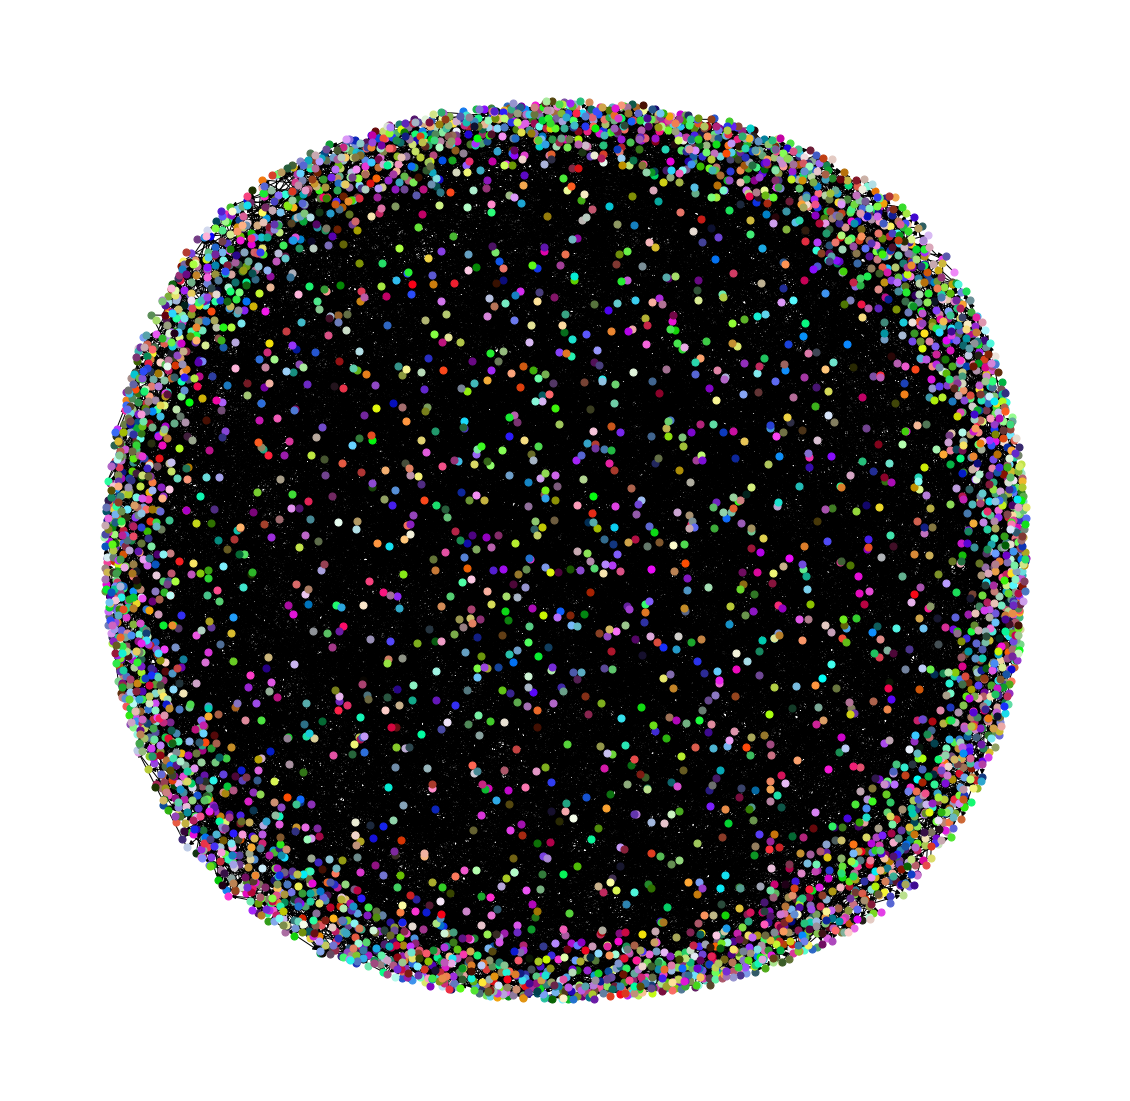

In [47]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(graph)
nx.draw_networkx_edges(graph, pos=pos, node_size=20)

colors = []
for i in range(len(communities)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=community, node_color=color, node_size=50)

_ = plt.axis('off')

In [48]:
def comunity(C):
    d = dict()
    for x in enumerate(C):
        d[x[0]] = C[x[0]]

    return d

In [56]:
dictt = comunity(communities)

for x, y in dictt.items():
    print("El largo(nodos) de la comunidad:", x, "es:", len(y))

El largo(nodos) de la comunidad: 0 es: 1
El largo(nodos) de la comunidad: 1 es: 1
El largo(nodos) de la comunidad: 2 es: 1
El largo(nodos) de la comunidad: 3 es: 1
El largo(nodos) de la comunidad: 4 es: 1
El largo(nodos) de la comunidad: 5 es: 1
El largo(nodos) de la comunidad: 6 es: 1
El largo(nodos) de la comunidad: 7 es: 1
El largo(nodos) de la comunidad: 8 es: 1
El largo(nodos) de la comunidad: 9 es: 1
El largo(nodos) de la comunidad: 10 es: 1
El largo(nodos) de la comunidad: 11 es: 1
El largo(nodos) de la comunidad: 12 es: 1
El largo(nodos) de la comunidad: 13 es: 1
El largo(nodos) de la comunidad: 14 es: 1
El largo(nodos) de la comunidad: 15 es: 1
El largo(nodos) de la comunidad: 16 es: 1
El largo(nodos) de la comunidad: 17 es: 1
El largo(nodos) de la comunidad: 18 es: 1
El largo(nodos) de la comunidad: 19 es: 1
El largo(nodos) de la comunidad: 20 es: 1
El largo(nodos) de la comunidad: 21 es: 1
El largo(nodos) de la comunidad: 22 es: 1
El largo(nodos) de la comunidad: 23 es: 1
El

In [66]:
print("cantidad total de comunidades:",  len(dictt))


cantidad total de comunidades: 2219
dict_values([(3,), (4,), (7,), (11,), (12,), (24,), (25,), (27,), (28,), (43,), (44,), (46,), (49,), (57,), (63,), (65,), (71,), (72,), (76,), (84,), (103,), (105,), (126,), (127,), (132,), (137,), (183,), (241,), (244,), (249,), (270,), (271,), (278,), (297,), (332,), (347,), (503,), (507,), (510,), (514,), (516,), (579,), (580,), (586,), (588,), (642,), (677,), (719,), (741,), (747,), (767,), (768,), (914,), (916,), (923,), (925,), (939,), (943,), (960,), (963,), (1069,), (1074,), (1077,), (1084,), (1104,), (1109,), (1115,), (1140,), (1155,), (1158,), (1181,), (1182,), (1219,), (1229,), (1268,), (1286,), (1298,), (1320,), (1333,), (1370,), (1464,), (1520,), (1551,), (1583,), (1589,), (1633,), (1637,), (1640,), (1656,), (1673,), (1698,), (1792,), (1887,), (2082,), (2171,), (2206,), (2225,), (2233,), (2236,), (2258,), (2260,), (2274,), (2294,), (2297,), (2427,), (2428,), (2429,), (2437,), (2440,), (2441,), (2466,), (2492,), (2501,), (2514,), (2520,),

In [60]:
import numpy as np

In [67]:
dictt

{0: (3,),
 1: (4,),
 2: (7,),
 3: (11,),
 4: (12,),
 5: (24,),
 6: (25,),
 7: (27,),
 8: (28,),
 9: (43,),
 10: (44,),
 11: (46,),
 12: (49,),
 13: (57,),
 14: (63,),
 15: (65,),
 16: (71,),
 17: (72,),
 18: (76,),
 19: (84,),
 20: (103,),
 21: (105,),
 22: (126,),
 23: (127,),
 24: (132,),
 25: (137,),
 26: (183,),
 27: (241,),
 28: (244,),
 29: (249,),
 30: (270,),
 31: (271,),
 32: (278,),
 33: (297,),
 34: (332,),
 35: (347,),
 36: (503,),
 37: (507,),
 38: (510,),
 39: (514,),
 40: (516,),
 41: (579,),
 42: (580,),
 43: (586,),
 44: (588,),
 45: (642,),
 46: (677,),
 47: (719,),
 48: (741,),
 49: (747,),
 50: (767,),
 51: (768,),
 52: (914,),
 53: (916,),
 54: (923,),
 55: (925,),
 56: (939,),
 57: (943,),
 58: (960,),
 59: (963,),
 60: (1069,),
 61: (1074,),
 62: (1077,),
 63: (1084,),
 64: (1104,),
 65: (1109,),
 66: (1115,),
 67: (1140,),
 68: (1155,),
 69: (1158,),
 70: (1181,),
 71: (1182,),
 72: (1219,),
 73: (1229,),
 74: (1268,),
 75: (1286,),
 76: (1298,),
 77: (1320,),
 

In [51]:
nx.shortest_path(graph)

{0: {0: [0],
  386: [0, 386],
  395: [0, 395],
  451: [0, 451],
  2307: [0, 386, 2307],
  387: [0, 386, 387],
  445: [0, 386, 445],
  446: [0, 386, 446],
  2213: [0, 395, 2213],
  2393: [0, 395, 2393],
  419: [0, 395, 419],
  453: [0, 451, 453],
  2330: [0, 386, 2307, 2330],
  2394: [0, 395, 2393, 2394],
  421: [0, 395, 419, 421],
  456: [0, 395, 419, 456],
  463: [0, 451, 453, 463],
  2405: [0, 386, 2307, 2330, 2405],
  465: [0, 395, 419, 456, 465],
  467: [0, 451, 453, 463, 467]},
 386: {386: [386],
  2307: [386, 2307],
  387: [386, 387],
  445: [386, 445],
  446: [386, 446],
  2330: [386, 2307, 2330],
  2405: [386, 2307, 2330, 2405]},
 395: {395: [395],
  2213: [395, 2213],
  2393: [395, 2393],
  419: [395, 419],
  2394: [395, 2393, 2394],
  421: [395, 419, 421],
  456: [395, 419, 456],
  465: [395, 419, 456, 465]},
 451: {451: [451],
  453: [451, 453],
  463: [451, 453, 463],
  467: [451, 453, 463, 467]},
 1: {1: [1],
  3553: [1, 3553],
  3586: [1, 3586],
  3587: [1, 3587],
  3637:

In [53]:
def modularity(G, partition):
    m = G.number_of_edges()

    degree = G.degree()
    norm = 1.0/(2.0*m)

    Q = 0.0
    for c in partition:
        for u, v in it.product(c, repeat=2):
            w = 1 if G.has_edge(u, v) else 0
            #  cuenta doble self loop
            if u == v:
                w *= 2.0
            Q += w - degree[u] * degree[v] * norm
    return norm*Q

In [54]:
#La modularidad de este grafo de conexiones electricas, nos dice que tiene una modularidad alta, queriendo decir que ente los nodos dentro de sus modulos/comunidades,
#existe conexion solida, pero entre los nodos de diferentes modulos/comunidades, existe poca conexion
modularity(graph, communities)

0.2091555231366636

In [55]:
print(nx.density(graph))

0.0002701513486673107
